In [1]:
import os
import sys

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

# import custom functions for data selection
from src.eda import *
print(os.getcwd())

C:\Users\samjd\Documents\flatiron\project_phase2\phase_2_project_chicago-sf-seattle-ds-082420


In [2]:
df_rp_sales = get_sales()
df_parcel = get_parcels()
df_res_bldg  = get_resBldg()
df_unit_breakdown = get_unit_breakdown()

Before Filer EXTR_RPSale.csv:  (61444, 24)
After Filer EXTR_RPSale.csv:  (61444, 7)
Before EXTR_Parcel.csv:  (616089, 81)
After Filer EXTR_Parcel.csv:  (616089, 26)
EXTR_ResBldg.csv:  (517554, 50)
After Filer EXTR_ResBldg.csv:  (517554, 31)
EXTR_UnitBreakdown:  (25382, 7)


In [3]:
# # check for columns of na's and zeros
# print((df_rp_sales == 0).all())
# print((df_parcel == 0).all())
# print((df_res_bldg == 0).all())
# print((df_lookup == 0).all())
# print((df_unit_breakdown == 0).all())
# print(df_rp_sales.isna().any())
# print(df_parcel.isna().any())
# print(df_res_bldg.isna().any())
# print(df_lookup.isna().any())
# print(df_unit_breakdown.isna().any())

In [4]:
def maj_min(df, drop=True):
    try:
        df.insert(0, 'Major+Minor', df.Major.astype(str) + df.Minor.astype(str))
        if drop==True:
            df.drop(['Major', 'Minor'], axis=1, inplace=True)
    except:
        print('columns missing')

    return df

In [5]:
maj_min(df_rp_sales)

,Major+Minor,DocumentDate,SalePrice,PropertyType,PrincipalUse,PropertyClass
4,2130430120,12/20/2019,560000,3,6,8
49,9197150200,07/08/2019,192000,3,2,3
98,8944440200,06/26/2019,185000,3,2,3
210,9406520630,07/22/2019,435000,11,6,8
420,6154900010,09/24/2019,775000,11,6,8
...,...,...,...,...,...,...
2107025,5727500100,05/08/2019,3900,1,6,7
2107026,5727500099,05/08/2019,3900,1,6,7
2107036,6362900116,09/13/2019,0,11,6,8
2107058,2826119037,10/30/2019,73000,91,6,7


In [6]:
maj_min(df_res_bldg)
# maj_min(df_lookup)
maj_min(df_unit_breakdown)
maj_min(df_parcel)

,Major+Minor,PropType,Area,SubArea,SqFtLot,WaterSystem,SewerSystem,Access,SeattleSkyline,LakeWashington,...,WfntBank,WfntPoorQuality,WfntRestrictedAccess,WfntAccessRights,WfntProximityInfluence,TidelandShoreland,TrafficNoise,AirportNoise,PowerLines,OtherNuisances
0,785662370,R,31.0,8.0,10300,2,2,4,0,0,...,0,0,0,N,N,0,0,0,N,N
1,99060025,R,42.0,11.0,5000,2,2,4,2,0,...,0,0,0,N,N,0,0,0,N,N
2,286210320,R,44.0,6.0,4280,2,2,4,0,0,...,0,0,0,N,N,0,0,0,N,N
3,264800225,R,28.0,11.0,12100,2,2,4,0,0,...,0,0,0,N,N,0,1,0,N,N
4,68918190,R,4.0,4.0,11554,2,2,4,0,0,...,0,0,0,N,N,0,0,0,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616084,375520160,R,37.0,2.0,7798,2,2,4,0,0,...,0,0,0,N,N,0,0,0,N,N
616085,7883601970,R,18.0,7.0,3840,2,2,4,0,0,...,0,0,0,N,N,0,0,0,N,N
616086,3277801434,R,77.0,6.0,972,2,2,4,0,0,...,0,0,0,N,N,0,0,0,N,N
616087,955020295,R,43.0,5.0,4488,2,2,4,0,0,...,0,0,0,N,N,0,0,0,N,N


In [7]:
df_parcel.columns

Index(['Major+Minor', 'PropType', 'Area', 'SubArea', 'SqFtLot', 'WaterSystem',
       'SewerSystem', 'Access', 'SeattleSkyline', 'LakeWashington',
       'LakeSammamish', 'SmallLakeRiverCreek', 'OtherView', 'WfntLocation',
       'WfntFootage', 'WfntBank', 'WfntPoorQuality', 'WfntRestrictedAccess',
       'WfntAccessRights', 'WfntProximityInfluence', 'TidelandShoreland',
       'TrafficNoise', 'AirportNoise', 'PowerLines', 'OtherNuisances'],
      dtype='object')

In [8]:
df = pd.merge(df_parcel, df_rp_sales, how='outer', on='Major+Minor')
print('1')
df = pd.merge(df, df_res_bldg, how='outer', on='Major+Minor')
print('2')
df = pd.merge(df, df_unit_breakdown, how='outer', on='Major+Minor')
print('3')

1
2
3


In [9]:
df.head

<bound method NDFrame.head of        Major+Minor PropType  Area  SubArea  SqFtLot  WaterSystem  SewerSystem  \
0        785662370        R  31.0      8.0  10300.0          2.0          2.0   
1         99060025        R  42.0     11.0   5000.0          2.0          2.0   
2        286210320        R  44.0      6.0   4280.0          2.0          2.0   
3        264800225        R  28.0     11.0  12100.0          2.0          2.0   
4         68918190        R   4.0      4.0  11554.0          2.0          2.0   
...            ...      ...   ...      ...      ...          ...          ...   
687240  1472200025      NaN   NaN      NaN      NaN          NaN          NaN   
687241  5727500100      NaN   NaN      NaN      NaN          NaN          NaN   
687242  5727500099      NaN   NaN      NaN      NaN          NaN          NaN   
687243  6362900116      NaN   NaN      NaN      NaN          NaN          NaN   
687244  1313500290      NaN   NaN      NaN      NaN          NaN          NaN  

In [52]:
df.SqFt = df[df.SqFt != 0]
df.SqFt.dropna()
df.SalePrice = df[df.SalePrice !=0]
df.SalePrice.dropna()

47        9275703430
100         33037060
101         33037060
102         33037060
103         33037060
             ...    
638004     948570191
638011     751850960
638012     751850960
638013     751850960
638023    6003001235
Name: SalePrice, Length: 25482, dtype: object

In [11]:
df.head(1)

,Major+Minor,PropType,Area,SubArea,SqFtLot,WaterSystem,SewerSystem,Access,SeattleSkyline,LakeWashington,...,BathFullCount,FpSingleStory,FpMultiStory,YrRenovated,PcntComplete,UnitTypeItemId,NbrThisType,SqFt,NbrBedrooms,NbrBaths
0,785662370,R,31.0,8.0,10300.0,2.0,2.0,4.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,NaN,NaN,785662370,NaN,NaN


In [12]:
df.shape

(687245, 64)

In [13]:
df.isna()

,Major+Minor,PropType,Area,SubArea,SqFtLot,WaterSystem,SewerSystem,Access,SeattleSkyline,LakeWashington,...,BathFullCount,FpSingleStory,FpMultiStory,YrRenovated,PcntComplete,UnitTypeItemId,NbrThisType,SqFt,NbrBedrooms,NbrBaths
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687240,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,False,True,True
687241,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,False,True,True
687242,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,False,True,True
687243,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,False,True,True


In [14]:
df.sort_values('NbrBedrooms')

,Major+Minor,PropType,Area,SubArea,SqFtLot,WaterSystem,SewerSystem,Access,SeattleSkyline,LakeWashington,...,BathFullCount,FpSingleStory,FpMultiStory,YrRenovated,PcntComplete,UnitTypeItemId,NbrThisType,SqFt,NbrBedrooms,NbrBaths
482097,7234601020,C,25.0,43.0,6000.0,2.0,2.0,4.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,,0.0
54833,3879901255,C,20.0,10.0,6400.0,2.0,2.0,4.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,,0.0
349599,276760875,C,19.0,50.0,7500.0,2.0,2.0,4.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,,0.0
100758,784670120,C,95.0,40.0,7000.0,2.0,2.0,4.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,,0.0
451688,332000490,C,40.0,10.0,4800.0,2.0,2.0,4.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,1.0,4.0,332000490,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687240,1472200025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1472200025,NaN,NaN
687241,5727500100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5727500100,NaN,NaN
687242,5727500099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5727500099,NaN,NaN
687243,6362900116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6362900116,NaN,NaN


In [15]:
df.dropna(subset=['NbrBedrooms'], inplace=True)

In [16]:
my_df = df.drop(labels=['SqFtTotBasement', 'SqFtFinBasement', 'LakeSammamish', 'PcntComplete', 'WfntPoorQuality', 'TidelandShoreland', 'LakeWashington', 'SewerSystem', 'WfntBank', 'WfntLocation', 'PropertyClass', 'WaterSystem', 'SmallLakeRiverCreek', 'WfntFootage', 'WfntRestrictedAccess'], axis=1)

In [17]:
corr=abs(my_df.corr())

mask = np.triu(np.ones_like(corr, dtype=np.bool))

In [18]:
my_df.corr()

,Area,SubArea,SqFtLot,Access,SeattleSkyline,OtherView,TrafficNoise,AirportNoise,PropertyType,PrincipalUse,...,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,YrRenovated,UnitTypeItemId,NbrThisType,NbrBaths
Area,1.000000,-0.136792,0.357376,-0.043146,-0.074410,0.076962,-0.043561,0.097933,-0.102760,0.163687,...,0.214386,0.214386,-0.214386,0.214386,NaN,0.214386,NaN,-0.048215,0.159617,0.146944
SubArea,-0.136792,1.000000,-0.022232,-0.003942,0.061236,0.042046,0.009670,0.025489,-0.072127,0.060064,...,0.550533,0.550533,-0.550533,0.550533,NaN,0.550533,NaN,-0.002863,0.065052,0.026116
SqFtLot,0.357376,-0.022232,1.000000,-0.028147,-0.058228,0.028626,-0.053629,0.046011,-0.121765,0.074752,...,0.503033,0.503033,-0.503033,0.503033,NaN,0.503033,NaN,-0.028334,0.296564,0.154801
Access,-0.043146,-0.003942,-0.028147,1.000000,0.008131,0.005144,0.001218,0.000620,-0.048507,-0.038044,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.021444,-0.014940,-0.056088
SeattleSkyline,-0.074410,0.061236,-0.058228,0.008131,1.000000,0.049672,0.099806,-0.037914,0.063422,0.039628,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.016526,0.040489,0.014177
OtherView,0.076962,0.042046,0.028626,0.005144,0.049672,1.000000,0.010690,-0.011860,-0.049339,0.015762,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.005735,0.028205,0.019555
TrafficNoise,-0.043561,0.009670,-0.053629,0.001218,0.099806,0.010690,1.000000,-0.023092,0.053623,0.036670,...,-0.577350,-0.577350,0.577350,-0.577350,NaN,-0.577350,NaN,0.017512,-0.020922,0.006964
AirportNoise,0.097933,0.025489,0.046011,0.000620,-0.037914,-0.011860,-0.023092,1.000000,-0.029840,0.045338,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.030089,0.000766,-0.018396
PropertyType,-0.102760,-0.072127,-0.121765,-0.048507,0.063422,-0.049339,0.053623,-0.029840,1.000000,0.168446,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.119512,-0.083309,-0.026430
PrincipalUse,0.163687,0.060064,0.074752,-0.038044,0.039628,0.015762,0.036670,0.045338,0.168446,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.001969,-0.006750,0.032632


In [19]:
my_df.shape

(25482, 49)

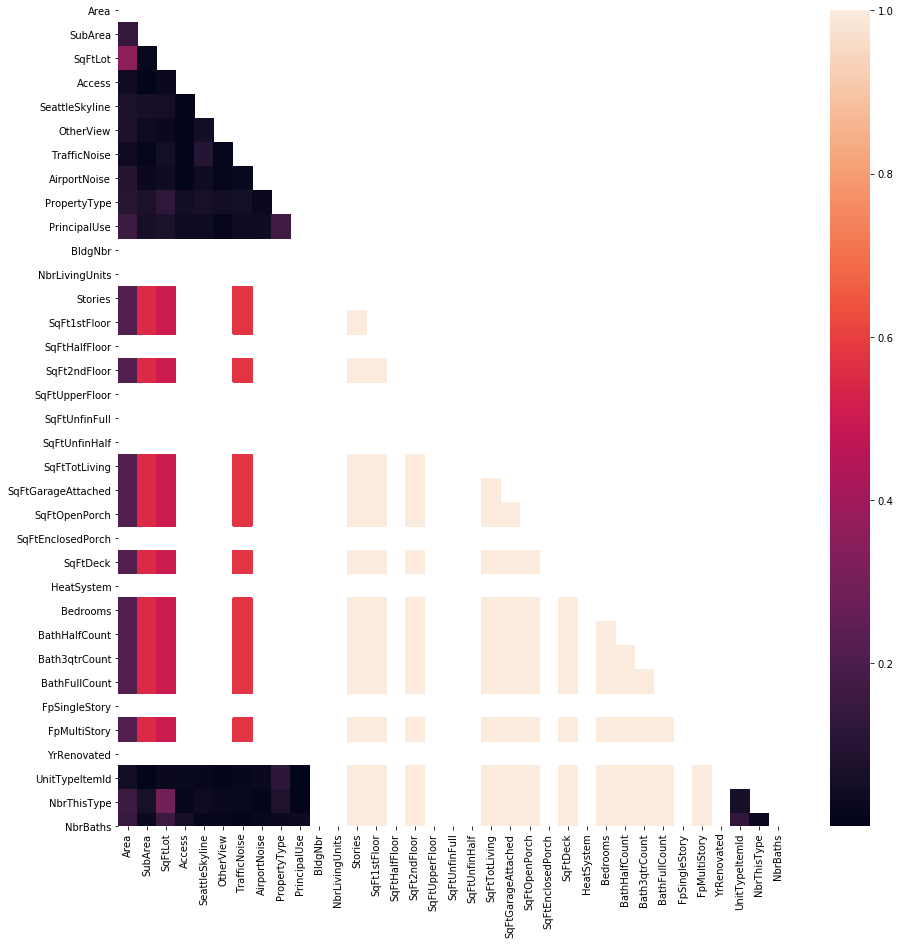

In [20]:
fig1, ax1 = plt.subplots(figsize=(15,15))
sns.heatmap(corr,mask=mask, ax=ax1)

In [21]:
keep_cols = ['SalePrice', 'TrafficNoise', 'AirportNoise', 'SqFt', "PowerLines", 'OtherNuisances']
keep_df = my_df[keep_cols]
keep_df.dropna()

# keep_df.columns

,SalePrice,TrafficNoise,AirportNoise,SqFt,PowerLines,OtherNuisances
47,9275703430,2.0,0.0,9275703430,N,N
100,33037060,0.0,0.0,33037060,N,N
101,33037060,0.0,0.0,33037060,N,N
102,33037060,0.0,0.0,33037060,N,N
103,33037060,0.0,0.0,33037060,N,N
...,...,...,...,...,...,...
637710,272420625,0.0,59.0,272420625,N,N
637884,2826059092,0.0,0.0,2826059092,N,N
637950,3021059326,0.0,0.0,3021059326,N,N
638004,948570191,1.0,0.0,948570191,N,N


In [22]:
keep_df.shape

(25482, 6)

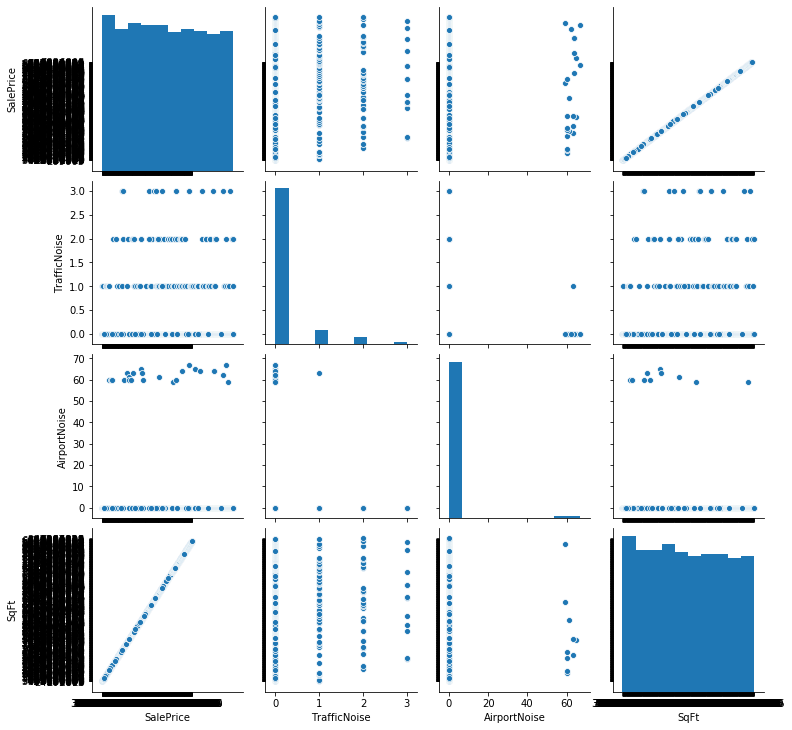

In [23]:
sns.pairplot(keep_df.sample(n=1000))

#### Addressing Point 6, ostensibly no correlation between nuisance and property values

In [24]:
keep_df.shape

(25482, 6)

In [70]:
# Create df of chosen predictors, 1000 samples
pred_df = keep_df.sample(1000).dropna()

# some chosen predictors are binary-categorical, convert "Y/N" to "1/0"
for pred in preds:
    # convert all numeric values to floats
    try:
        preds[pred] = preds[pred].astype(float)
        
    # if value is non-numeric, convert to numeric
    except:
        for i in range(len(preds[pred])):
            
            if str(preds[pred].iloc[i]) == 'Y':
                preds[pred].iloc[i] = 1
                
            else:
                preds[pred].iloc[i] = 0
                
# get saleprice samples
target = pred_df.SalePrice
# choose 1000 samples
preds = pred_df.drop('SalePrice', axis=1, inplace=False)

In [71]:
target.shape

(710,)

In [72]:
preds_scaled = (preds-np.mean(preds))/np.std(preds)

TypeError: unsupported operand type(s) for -: 'str' and 'float'

In [73]:
type(np.array(target)[5])

str

In [74]:
predictors = sm.add_constant(preds_scaled)
model = sm.OLS(np.array(target)[:1], np.array(predictors)[:1]).fit()
model.summary()

TypeError: can't multiply sequence by non-int of type 'float'